In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the image
image_path = 'musk babai.png'
original_img = cv2.imread(image_path)


In [3]:
# 1. Resize
resized_img = cv2.resize(original_img, (500, 500))

In [4]:
# 2. Changing brightness using gamma value
gamma = 1.5
gamma_corrected_img = np.clip((original_img / 255.0) ** gamma, 0, 1) * 255.0
gamma_corrected_img = gamma_corrected_img.astype(np.uint8)

In [5]:
# 3. Apply smoothing filters
smoothed_gaussian = cv2.GaussianBlur(original_img, (5, 5), 0)
smoothed_median = cv2.medianBlur(original_img, 5)

In [6]:
# 4. Apply sharpening filters
laplacian = cv2.Laplacian(original_img, cv2.CV_64F)
mean_filter = cv2.filter2D(original_img, -1, np.ones((3, 3), np.float32) / 9)
gaussian_filter = cv2.GaussianBlur(original_img, (5, 5), 0)

In [7]:
# 5. Plot Histogram of an image
original_hist = cv2.calcHist([original_img], [0], None, [256], [0, 256])

In [8]:
# 6. Histogram equalization
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)

In [9]:
# Displaying the results
plt.figure(figsize=(15, 15))


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

(<Axes: title={'center': 'Resized Image'}>,
 Text(0.5, 1.0, 'Resized Image'))

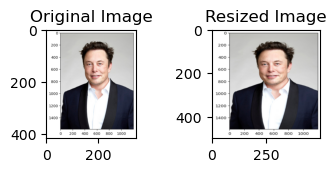

In [10]:
# Original and resized images
plt.subplot(3, 3, 1), plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(3, 3, 2), plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)), plt.title('Resized Image')

(<Axes: title={'center': 'Gamma Corrected'}>,
 Text(0.5, 1.0, 'Gamma Corrected'))

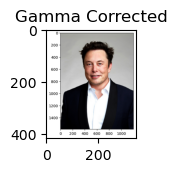

In [11]:
# Gamma correction
plt.subplot(3, 3, 3), plt.imshow(cv2.cvtColor(gamma_corrected_img, cv2.COLOR_BGR2RGB)), plt.title('Gamma Corrected')

(<Axes: title={'center': 'Median Blur'}>,
 Text(0.5, 1.0, 'Median Blur'))

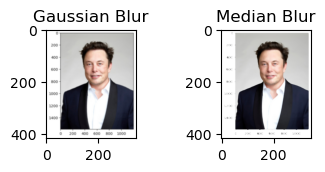

In [12]:
# Smoothing filters
plt.subplot(3, 3, 4), plt.imshow(cv2.cvtColor(smoothed_gaussian, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Blur')
plt.subplot(3, 3, 5), plt.imshow(cv2.cvtColor(smoothed_median, cv2.COLOR_BGR2RGB)), plt.title('Median Blur')

(<Axes: title={'center': 'Gaussian Filter'}>,
 Text(0.5, 1.0, 'Gaussian Filter'))

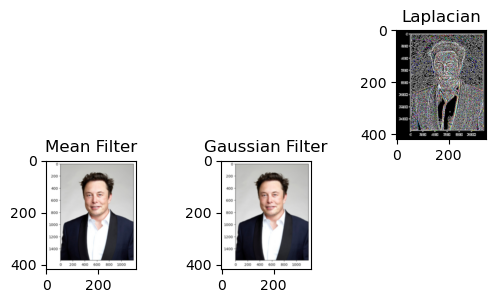

In [13]:
# Sharpening filters
plt.subplot(3, 3, 6), plt.imshow(cv2.cvtColor(laplacian.astype(np.uint8), cv2.COLOR_BGR2RGB)), plt.title('Laplacian')
plt.subplot(3, 3, 7), plt.imshow(cv2.cvtColor(mean_filter, cv2.COLOR_BGR2RGB)), plt.title('Mean Filter')
plt.subplot(3, 3, 8), plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Filter')

(<Axes: title={'center': 'Histogram'}>,
 Text(0.5, 1.0, 'Histogram'))

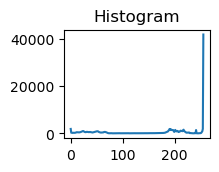

In [14]:
# Histogram
plt.subplot(3, 3, 9), plt.plot(original_hist), plt.title('Histogram')

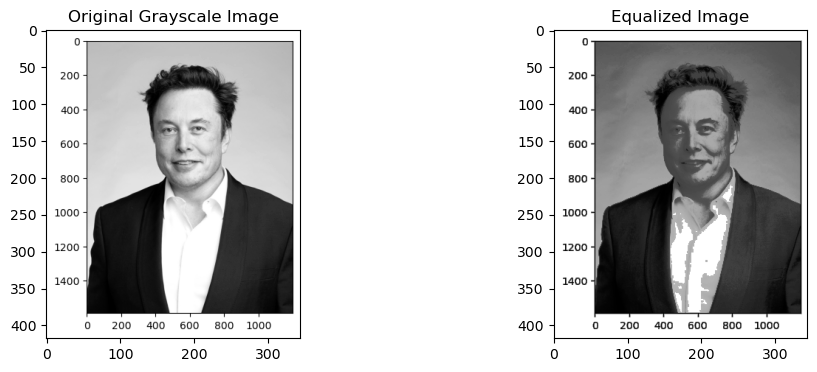

In [15]:
# Histogram Equalization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(gray_img, cmap='gray'), plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized Image')

plt.show()